In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Load tha data for the pose
poseName = 'Tendu'
loaded = np.load("RootCoordinates/"+poseName+'X.npy')
print("Loaded: ",loaded)
print("Length:", len(loaded))

Loaded:  [[0.51232  0.276488 0.874558 ... 0.520434 0.758888 0.839005]
 [0.514263 0.276551 0.882466 ... 0.522431 0.758982 0.824334]
 [0.518342 0.276565 0.868114 ... 0.516298 0.759002 0.815286]
 ...
 [0.493936 0.301091 0.84863  ... 0.518592 0.731722 0.788134]
 [0.493955 0.298433 0.845354 ... 0.518581 0.731681 0.797879]
 [0.495964 0.298396 0.850061 ... 0.51852  0.731617 0.805679]]
Length: 870


870


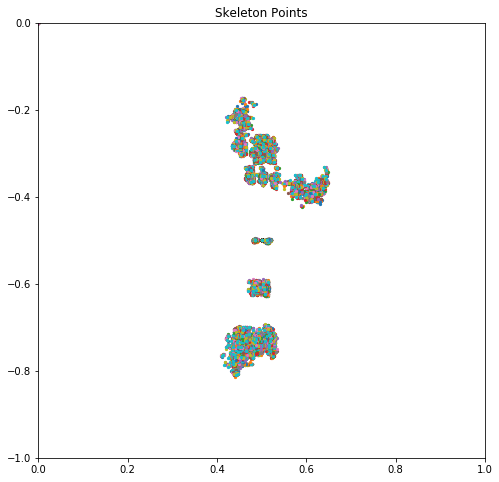

In [3]:
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for list in loaded:
        x = list[0::3]
        posY = list[1::3]
        y = [-y for y in posY] #need to make the loaded y values negative for plotting correctly.
        c = list[2::3]
        sc = ax.scatter(x,y,s=5)
        count+=1
plotCoordinates()
print(count)

870


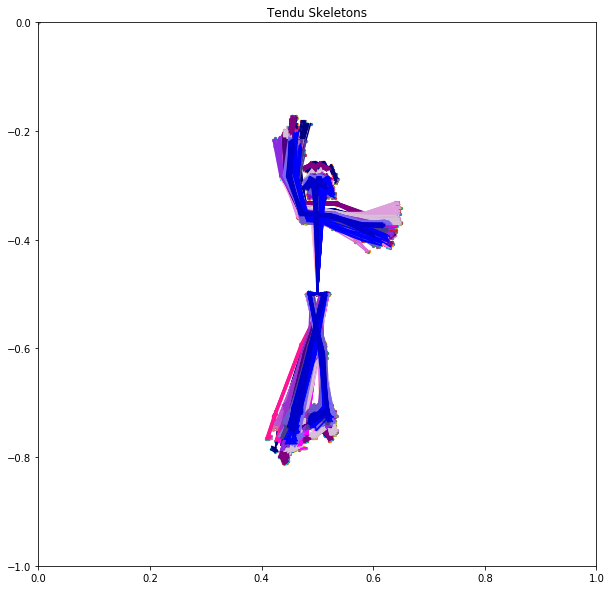

In [4]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']

allXList =[]
allYList = []
allCList=[]

dancerNum = 0
count = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title(poseName +' Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    global count
    for list in loaded:
        x = list[0::3]
        allXList.append(x)# all x values per sample
        posY = list[1::3]
        y = [-y for y in posY]# all y values per sample
        allYList.append(y) # the negative values get saved as the mean skeleton.
        c = list[2::3]
        allCList.append(c)# all c values per sample
        sc = ax.scatter(x,y,s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        count+=1
        if count%30 == 0:
            dancerNum+=1
            #print(dancerNum)
plotSkeletons()
print(count)

In [5]:
#Save the split up lists in XYCSplitListsDirectory
np.save('XYCSplitLists/all'+poseName+'XList.npy', allXList)
np.save('XYCSplitLists/all'+poseName+'YList.npy', allYList)
np.save('XYCSplitLists/all'+poseName+'CList.npy', allCList)

xloaded = np.load('XYCSplitLists/all'+poseName+'XList.npy')
print(xloaded)
yloaded = np.load('XYCSplitLists/all'+poseName+'YList.npy')
print(yloaded)
cloaded = np.load('XYCSplitLists/all'+poseName+'CList.npy')
print(xloaded)

[[0.51232  0.504157 0.473509 ... 0.477557 0.479664 0.520434]
 [0.514263 0.502024 0.473399 ... 0.479538 0.483625 0.522431]
 [0.518342 0.506019 0.473427 ... 0.475482 0.479553 0.516298]
 ...
 [0.493936 0.497987 0.46945  ... 0.483782 0.485865 0.518592]
 [0.493955 0.497969 0.469425 ... 0.483779 0.485846 0.518581]
 [0.495964 0.499972 0.469443 ... 0.485737 0.487799 0.51852 ]]
[[-0.276488 -0.344686 -0.339219 ... -0.761506 -0.75873  -0.758888]
 [-0.276551 -0.344727 -0.339236 ... -0.761682 -0.758919 -0.758982]
 [-0.276565 -0.344691 -0.331175 ... -0.761564 -0.758804 -0.759002]
 ...
 [-0.301091 -0.353013 -0.350395 ... -0.737085 -0.726271 -0.731722]
 [-0.298433 -0.352974 -0.350314 ... -0.737074 -0.726265 -0.731681]
 [-0.298396 -0.352971 -0.352844 ... -0.734398 -0.726157 -0.731617]]
[[0.51232  0.504157 0.473509 ... 0.477557 0.479664 0.520434]
 [0.514263 0.502024 0.473399 ... 0.479538 0.483625 0.522431]
 [0.518342 0.506019 0.473427 ... 0.475482 0.479553 0.516298]
 ...
 [0.493936 0.497987 0.46945  ...

In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
sumCList =[sum(k) for k in zip(*allCList)]
print(sumXList)
print(sumYList)
print(sumCList)

#Get the average: sum/count - count calculated in cell 2 of this notebook = number of samples.
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
avgCList =[sc / count for sc in sumCList]
print(avgXList)
print(avgYList)
print(avgCList)

[439.5600419999998, 436.0433970000001, 411.59180199999975, 392.0851750000004, 394.97357700000043, 460.5107469999997, 503.8376969999998, 540.0509610000003, 435.0, 422.20802699999996, 442.22152700000004, 447.29389899999967, 447.62446200000056, 423.18863700000014, 398.3562779999998, 433.1629209999997, 445.41377699999975, 422.74779099999967, 423.6559890000001, 387.7608560000002, 391.7082189999998, 396.2638419999995, 424.52598399999994, 426.7433380000002, 452.93483200000054]
[-256.82429399999995, -309.12266599999975, -306.13315600000044, -244.707585, -187.25469499999994, -312.66949699999975, -327.3862570000001, -332.9329310000004, -435.0, -434.9292420000004, -529.4014280000002, -627.2631380000003, -435.54157200000026, -527.5928370000005, -627.8032159999996, -250.38417400000012, -250.66142200000004, -261.82487499999985, -246.48671699999994, -664.281165, -662.1476250000012, -639.4438199999998, -642.4700150000001, -637.9525139999998, -638.5858019999997]
[786.0358650000002, 780.1405399999995, 7

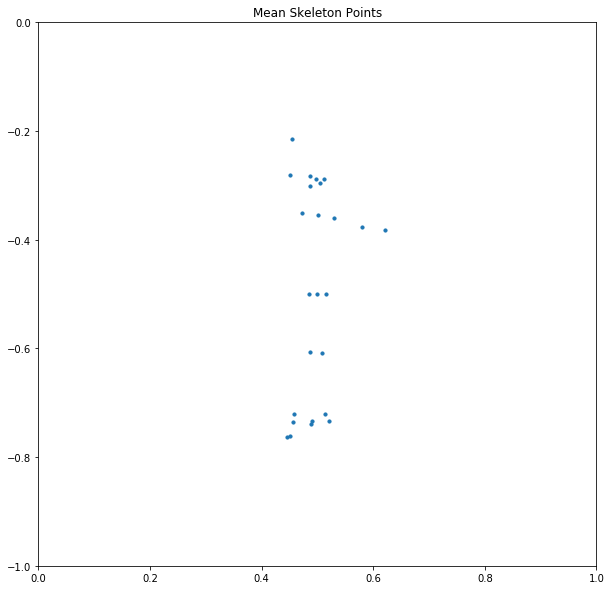

In [7]:
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics

In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]
standardDeviationC = [statistics.stdev(i) for i in zip(*allCList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY)
print("Standard Deviations of C values:",standardDeviationC)

Standard Deviations of X values: [0.006527718018076369, 0.003561100327275123, 0.004597840121265382, 0.007599922338953166, 0.010911259993203724, 0.004576403576567726, 0.007520775969050518, 0.013284112698263422, 0.0, 0.002492547191137533, 0.004136357059207505, 0.005990614503176472, 0.002680736842137436, 0.006180874808310241, 0.010877923224782685, 0.006246098264483261, 0.0056874506399669286, 0.00548472355588352, 0.12664619984008577, 0.011501251890359278, 0.012559906013268535, 0.011606225847967337, 0.007923630091928544, 0.0069387866052207006, 0.006633603557847474]
Standard Deviations of Y values: [0.011365028714677365, 0.007753276681553473, 0.008077909330032067, 0.0118686695995278, 0.014187514921097712, 0.00875546280174372, 0.01019401265807473, 0.01531021863682525, 0.0, 0.0012557257157751476, 0.007961899210104241, 0.012607135495441275, 0.0014228997724220185, 0.008383030674692392, 0.0137348859442245, 0.010656791006183842, 0.010652473234291462, 0.01073507204112725, 0.07441802166161819, 0.017

In [10]:
#plot standard deviation coordinates?
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('Stats/'+poseName+'StdDevX.npy', standardDeviationX)
np.save('Stats/'+poseName+'StdDevY.npy', standardDeviationY)
np.save('Stats/'+poseName+'StdDevC.npy', standardDeviationY)
np.save('Stats/'+poseName+'MeanX.npy', avgXList)
np.save('Stats/'+poseName+'MeanY.npy', avgYList)
np.save('Stats/'+poseName+'MeanC.npy', avgCList)